In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the CSV files into DataFrames
df_yolov8_x1280 = pd.read_csv('speed_test_x1280_yolov8.csv')
df_yolov8_x640 = pd.read_csv('speed_test_x640_yolov8.csv')
df_rtdetr_x1280 = pd.read_csv('speed_test_x1280_rtdetr.csv').iloc[0:5]
df_rtdetr_x640 = pd.read_csv('speed_test_x640_rtdetr.csv').iloc[0:5]

# Display the first few rows of each DataFrame to understand their structure
# df_yolov8_x1280.head(), df_yolov8_x640.head(), df_rtdetr_x1280.head(), df_rtdetr_x640.head()

In [142]:
rs = map(lambda x: x.split("_")[1] if len(x.split("_"))==3 else "_".join(x.split("_")[1:3]), df_rtdetr_x640["Model"].values)
new_names = list(map(lambda x: " ".join(x), (zip(["RT-DETR"] * len(df_rtdetr_x640), rs))))
df_rtdetr_x640["Model"] = new_names
df_rtdetr_x1280["Model"] = new_names

In [143]:
new_names = df_yolov8_x640["Model"].apply(lambda x: "YOLOv8-" + x[6:].capitalize())
df_yolov8_x640["Model"] = new_names
df_yolov8_x1280["Model"] = new_names

In [45]:
plt.rcParams.update({'font.size': 12})
# make grid dotted
plt.rcParams.update({'axes.grid': True, 'grid.linestyle': ':'})

In [ ]:
# Combine the inference time data for all models and resolutions
data = {
    'Model': df_yolov8_x1280['Model'].tolist() + df_yolov8_x640['Model'].tolist() + df_rtdetr_x1280['Model'].tolist() + df_rtdetr_x640['Model'].tolist(),
    'Inference Time (ms)': df_yolov8_x1280['inference'].tolist() + df_yolov8_x640['inference'].tolist() + df_rtdetr_x1280['inference'].tolist() + df_rtdetr_x640['inference'].tolist(),
    'Resolution': ['1280px']*len(df_yolov8_x1280) + ['640px']*len(df_yolov8_x640) + ['1280px']*len(df_rtdetr_x1280) + ['640px']*len(df_rtdetr_x640),
    'Model Type': ['YOLOv8']*len(df_yolov8_x1280) + ['YOLOv8']*len(df_yolov8_x640) + ['RT-DETR']*len(df_rtdetr_x1280) + ['RT-DETR']*len(df_rtdetr_x640)
}

df_combined = pd.DataFrame(data)

# Pivot table for easier plotting
pivot_df = df_combined.pivot_table(index=['Model Type', 'Model'], columns='Resolution', values='Inference Time (ms)')

# Plot
pivot_df.plot(kind='bar', figsize=(14, 8))
plt.title('Inference Time Comparison Across Models and Resolutions')
plt.ylabel('Inference Time (ms)')
plt.xlabel('Model Type and Variant')
# plt.xticks(rotation=10)
plt.legend(title='Resolution')
plt.tight_layout()
# plt.grid()

# plt.show()


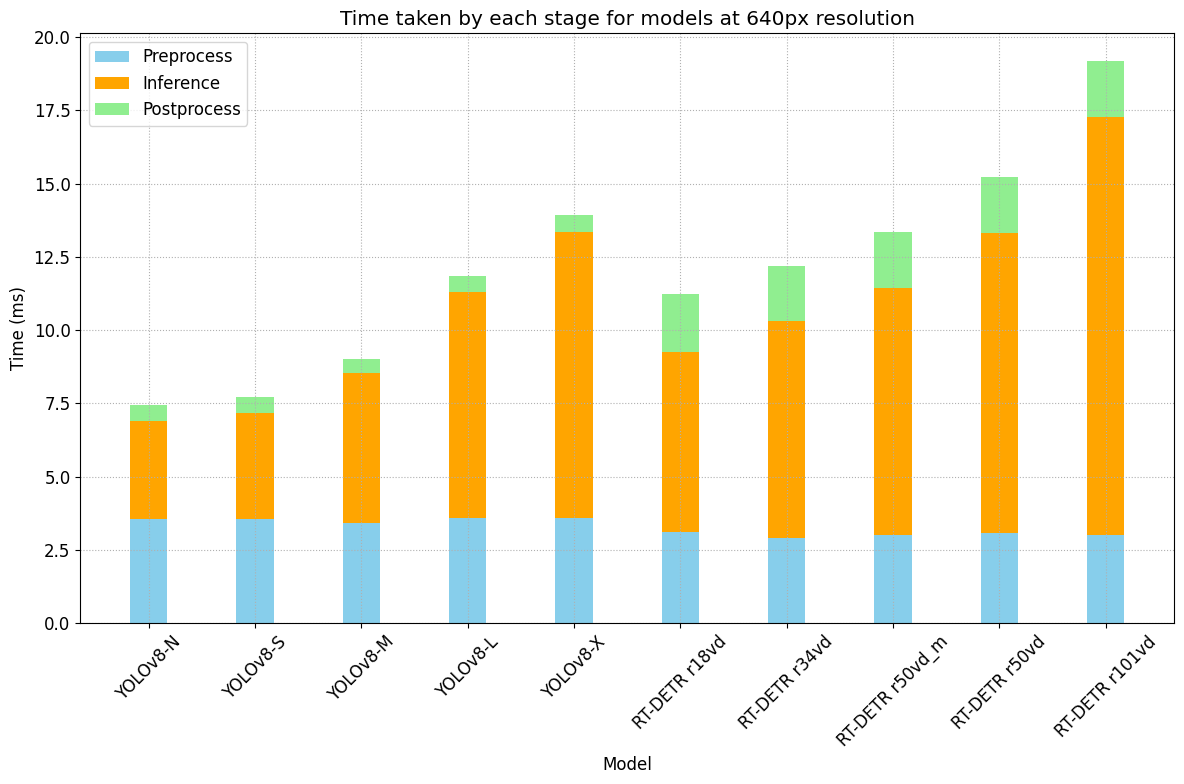

In [122]:
# Filter data for requirements: only first 5 rows for x640 resolution
df_yolov8_x640_filtered = df_yolov8_x640
df_rtdetr_x640_filtered = df_rtdetr_x640

# Combine the filtered dataframes
df_filtered_combined = pd.concat([df_yolov8_x640_filtered, df_rtdetr_x640_filtered])

# Preparing data for plotting
n_groups = df_filtered_combined.shape[0]
index = np.arange(n_groups)
bar_width = 0.35

# Time in ms for each stage
preprocess_times = df_filtered_combined['preprocess'].values
inference_times = df_filtered_combined['inference'].values
postprocess_times = df_filtered_combined['postprocess'].values

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(index, preprocess_times, bar_width, label='Preprocess', color='skyblue')
bar2 = ax.bar(index, inference_times, bar_width, bottom=preprocess_times, label='Inference', color='orange')
bar3 = ax.bar(index, postprocess_times, bar_width, bottom=preprocess_times+inference_times, label='Postprocess', color='lightgreen')

ax.set_xlabel('Model')
ax.set_ylabel('Time (ms)')
ax.set_title('Time taken by each stage for models at 640px resolution')
ax.set_xticks(index)
ax.set_xticklabels(df_filtered_combined['Model'], rotation=45)
ax.legend()

plt.tight_layout()
# plt.show()
plt.savefig('time_per_stage_640px.png')

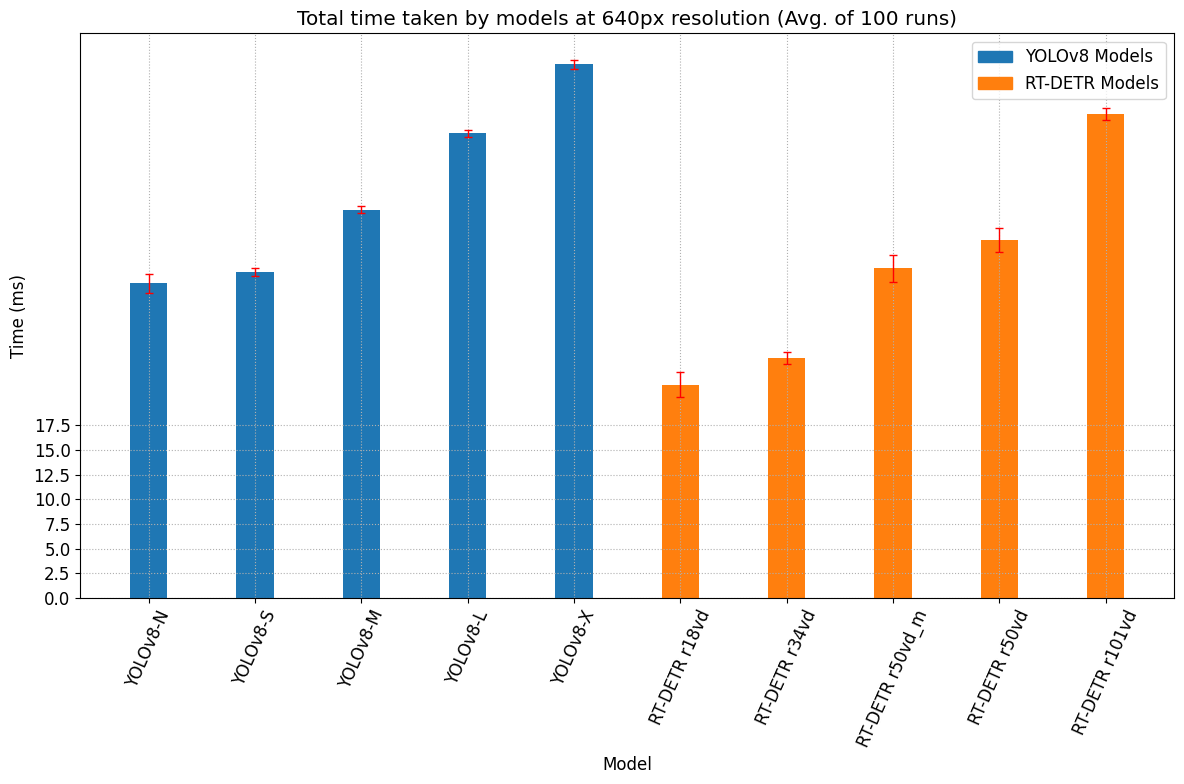

In [154]:
from matplotlib.patches import Patch

# Use only the "outer_total" column for the same models at 640px resolution
outer_total_times = df_filtered_combined['outer_total'].values #- df_filtered_combined["preprocess"].values
outer_total_std = df_filtered_combined['outer_total_std'].values


# Creating the plot with "outer_total" times
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['C0'] * 5 + ['C1'] * 5  # First 5 bars blue, next 5 bars red
ax.bar(index, outer_total_times, bar_width, color=colors, yerr=outer_total_std, capsize=3, error_kw=dict(elinewidth=1, ecolor='r'))
# bar = ax.bar(index, outer_total_times, bar_width, color=colors)

ax.set_xlabel('Model')
ax.set_ylabel('Time (ms)')
ax.set_title('Total time taken by models at 640px resolution (Avg. of 100 runs)')
ax.set_xticks(index)
ax.set_xticklabels(df_filtered_combined['Model'], rotation=66)
plt.yticks(np.arange(0, 20, 2.5))

legend_patches = [Patch(color='C0', label='YOLOv8 Models'),
                  Patch(color='C1', label='RT-DETR Models')]
ax.legend(handles=legend_patches)

plt.tight_layout()
# plt.show()
plt.savefig('total_time_640px.png')

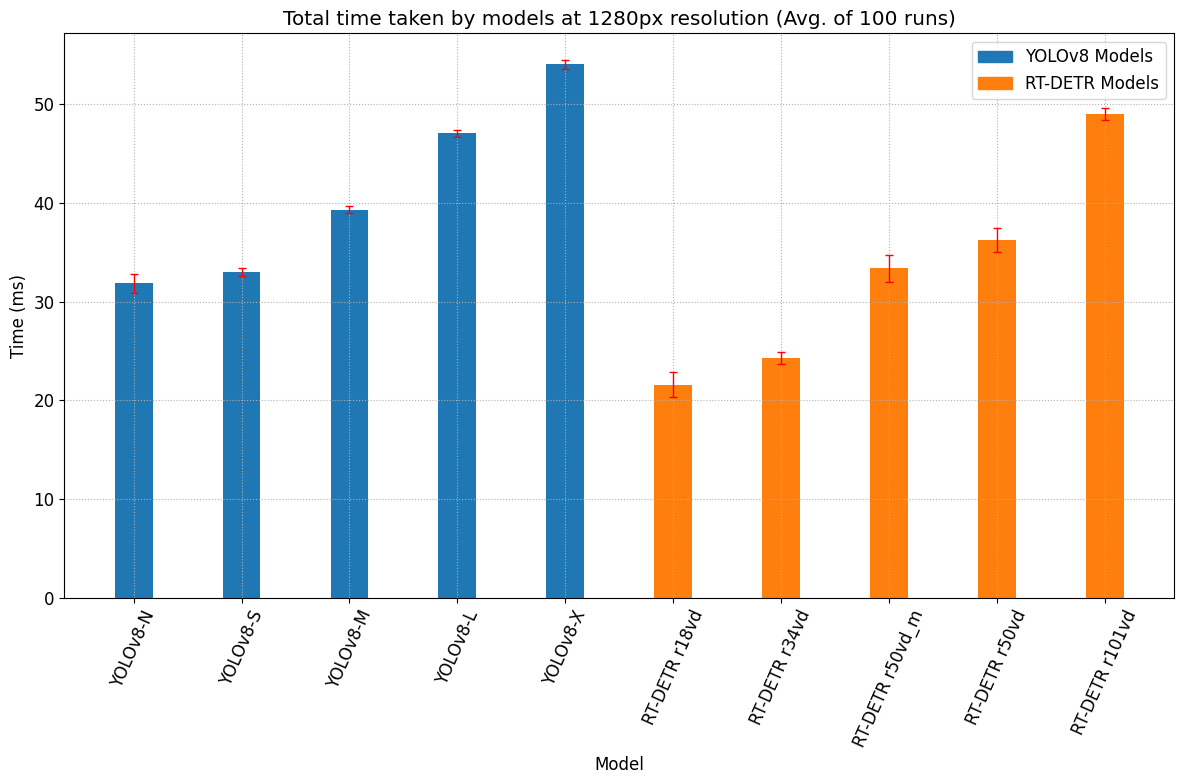

In [153]:
from matplotlib.patches import Patch

df_filtered_combined = pd.concat([df_yolov8_x1280, df_rtdetr_x1280])

# Preparing data for plotting
n_groups = df_filtered_combined.shape[0]
index = np.arange(n_groups)
bar_width = 0.35

# Use only the "outer_total" column for the same models at 1280px resolution
outer_total_times = df_filtered_combined['outer_total'].values #- df_filtered_combined["preprocess"].values
outer_total_std = df_filtered_combined['outer_total_std'].values


# Creating the plot with "outer_total" times
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['C0'] * 5 + ['C1'] * 5  # First 5 bars blue, next 5 bars red
ax.bar(index, outer_total_times, bar_width, color=colors, yerr=outer_total_std, capsize=3, error_kw=dict(elinewidth=1, ecolor='r'))
# bar = ax.bar(index, outer_total_times, bar_width, color=colors)

ax.set_xlabel('Model')
ax.set_ylabel('Time (ms)')
ax.set_title('Total time taken by models at 1280px resolution (Avg. of 100 runs)')
ax.set_xticks(index)
ax.set_xticklabels(df_filtered_combined['Model'], rotation=66)
plt.yticks(np.arange(0, 60, 10))

legend_patches = [Patch(color='C0', label='YOLOv8 Models'),
                  Patch(color='C1', label='RT-DETR Models')]
ax.legend(handles=legend_patches)

plt.tight_layout()
# plt.show()
plt.savefig('total_time_1280px.png')

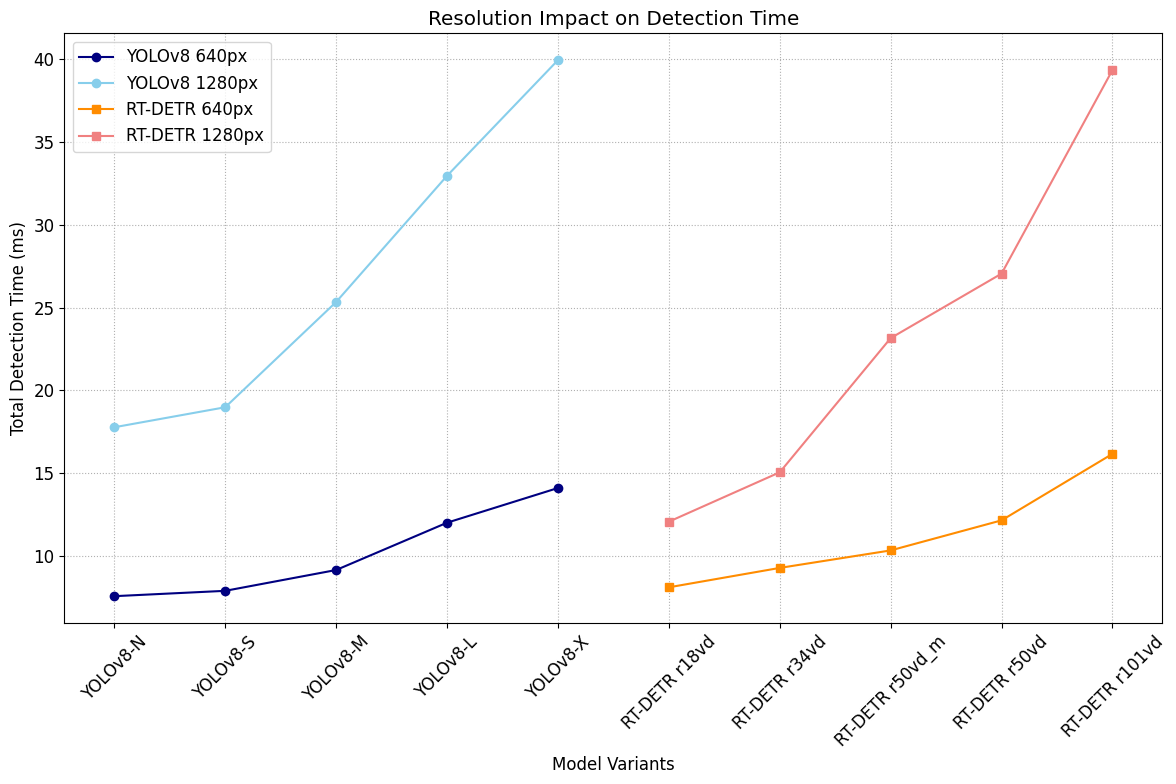

In [146]:
import matplotlib.pyplot as plt

# Extracting the first 5 models from each table
models_yolov8_x1280 = df_yolov8_x1280['Model']
total_time_yolov8_x1280 = df_yolov8_x1280['outer_total'] - df_yolov8_x1280["preprocess"]

models_yolov8_x640 = df_yolov8_x640['Model']
total_time_yolov8_x640 = df_yolov8_x640['outer_total'] - df_yolov8_x640["preprocess"]

models_rtdetr_x1280 = df_rtdetr_x1280['Model']
total_time_rtdetr_x1280 = df_rtdetr_x1280['outer_total'] - df_rtdetr_x1280["preprocess"]

models_rtdetr_x640 = df_rtdetr_x640['Model']
total_time_rtdetr_x640 = df_rtdetr_x640['outer_total'] - df_rtdetr_x640["preprocess"]

# Plotting
plt.figure(figsize=(12, 8))

# YOLOv8 Plot
plt.plot(models_yolov8_x640, total_time_yolov8_x640, label='YOLOv8 640px', marker='o', color='navy')
plt.plot(models_yolov8_x1280, total_time_yolov8_x1280, label='YOLOv8 1280px', marker='o', color='skyblue')

# RT-DETR Plot
plt.plot(models_rtdetr_x640, total_time_rtdetr_x640, label='RT-DETR 640px', marker='s', color='darkorange')
plt.plot(models_rtdetr_x1280, total_time_rtdetr_x1280, label='RT-DETR 1280px', marker='s', color='lightcoral')

plt.title('Resolution Impact on Detection Time')
plt.xlabel('Model Variants')
plt.ylabel('Total Detection Time (ms)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('total_time_resolution_impact.png')

In [6]:
yolov8_eval = pd.read_csv("yolov8_eval.csv")
rtdetr_eval = pd.read_csv("rtdetr_eval.csv").head(5)

In [7]:
pd.concat([yolov8_eval, rtdetr_eval]).reset_index(drop=True)

,Model,Precision,Recall,mAP
0,YOLOv8-N,0.7032,0.3731,0.3193
1,YOLOv8-S,0.6813,0.4347,0.3849
2,YOLOv8-M,0.6933,0.4753,0.4235
3,YOLOv8-L,0.7153,0.4834,0.4359
4,YOLOv8-X,0.7082,0.4904,0.4448
5,RT-DETR r18,0.3994,0.5682,0.4585
6,RT-DETR r34,0.4147,0.5709,0.4697
7,RT-DETR r50_m,0.4311,0.5827,0.4881
8,RT-DETR r50,0.4401,0.5927,0.5020
9,RT-DETR r101,0.4416,0.5977,0.5107


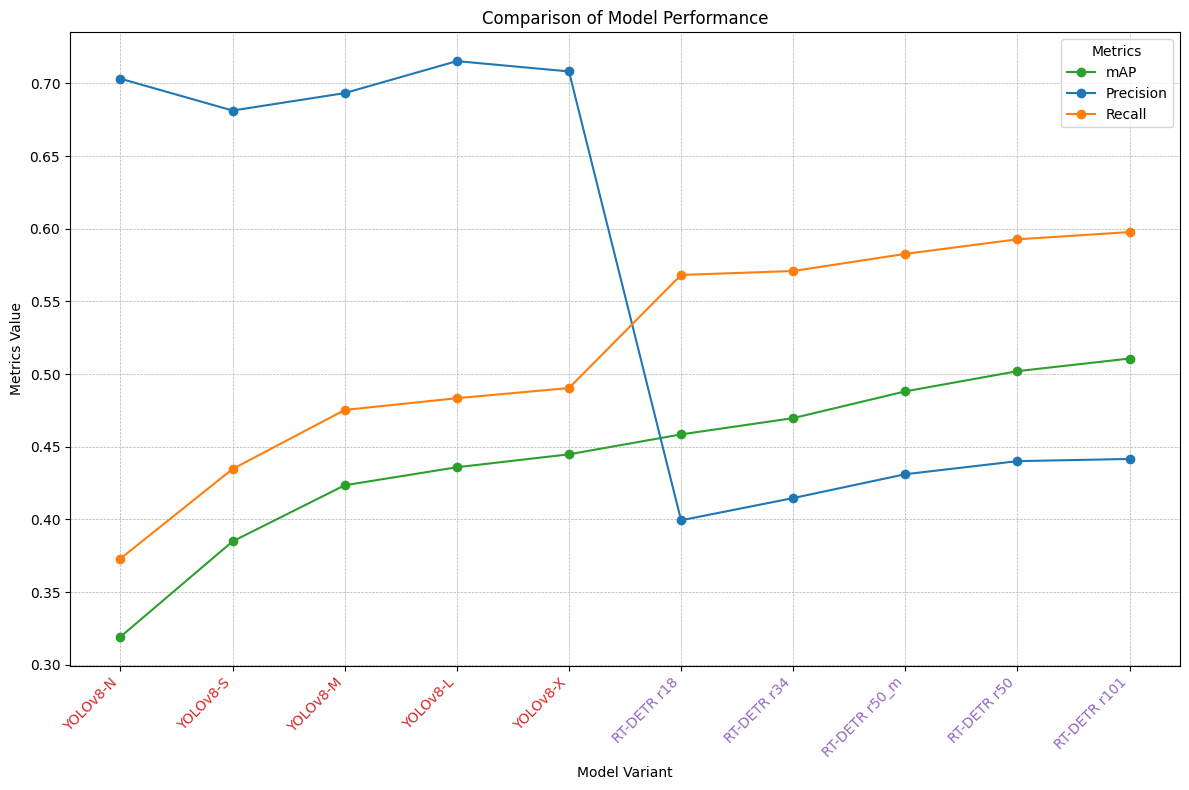

In [9]:
# Reorder DataFrame to plot YOLOv8 models first, then RT-DETR models
ordered_df = pd.concat([yolov8_eval, rtdetr_eval]).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

# Colors
colors = {'mAP': '#2ca02c', 'Precision': '#1f77b4', 'Recall': '#ff7f0e'}
model_type_colors = {'YOLOv8': '#d62728', 'RT-DETR': '#9467bd'}

# Line plot for each metric
for metric in ['mAP', 'Precision', 'Recall']:
    plt.plot(ordered_df['Model'], ordered_df[metric], marker='o', label=metric, color=colors[metric])

# Customizing ticks to differentiate model types
plt.xticks(range(len(ordered_df['Model'])), ordered_df['Model'], rotation=45, ha='right')
for i, model in enumerate(ordered_df['Model']):
    color = model_type_colors['YOLOv8'] if 'YOLOv8' in model else model_type_colors['RT-DETR']
    plt.gca().get_xticklabels()[i].set_color(color)

plt.title('Comparison of Model Performance')
plt.ylabel('Metrics Value')
plt.xlabel('Model Variant')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Metrics')
plt.tight_layout()

plt.show()

/tmp/ipykernel_122404/366404280.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_yolov8['Model'], rotation=45, ha="right")
/tmp/ipykernel_122404/366404280.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_rtdetr['Model'], rotation=45, ha="right")


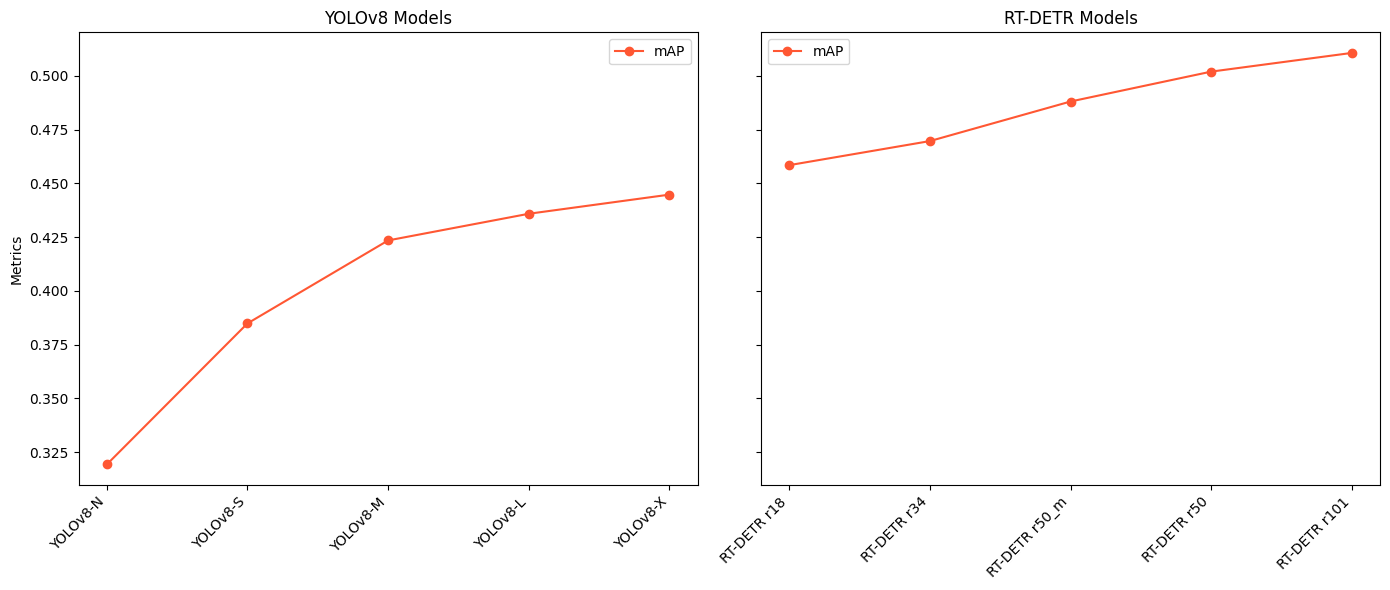

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Given CSV data
csv_data = """
Model,Precision,Recall,mAP
RT-DETR r18,0.3994,0.5682,0.4585
RT-DETR r34,0.4147,0.5709,0.4697
RT-DETR r50_m,0.4311,0.5827,0.4881
RT-DETR r50,0.4401,0.5927,0.502
RT-DETR r101,0.4416,0.5977,0.5107
YOLOv8-N,0.7032,0.3731,0.3193
YOLOv8-S,0.6813,0.4347,0.3849
YOLOv8-M,0.6933,0.4753,0.4235
YOLOv8-L,0.7153,0.4834,0.4359
YOLOv8-X,0.7082,0.4904,0.4448
"""

# Read the CSV data into a DataFrame
df = pd.read_csv(StringIO(csv_data))

# Split the DataFrame into two based on model type
df_yolov8 = df[df['Model'].str.contains("YOLOv8")].reset_index(drop=True)
df_rtdetr = df[~df['Model'].str.contains("YOLOv8")].reset_index(drop=True)

metrics = ['mAP', 'Precision', 'Recall'][:1]
colors = {'mAP': '#FF5733', 'Precision': '#3498DB', 'Recall': '#2ECC71'}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# YOLOv8 subplot
for metric in metrics:
    axes[0].plot(df_yolov8['Model'], df_yolov8[metric], marker='o', label=metric, color=colors[metric])
axes[0].set_title('YOLOv8 Models')
axes[0].set_xticklabels(df_yolov8['Model'], rotation=45, ha="right")
axes[0].set_ylabel('Metrics')
axes[0].legend()

# RT-DETR subplot
for metric in metrics:
    axes[1].plot(df_rtdetr['Model'], df_rtdetr[metric], marker='o', label=metric, color=colors[metric])
axes[1].set_title('RT-DETR Models')
axes[1].set_xticklabels(df_rtdetr['Model'], rotation=45, ha="right")
axes[1].legend()

plt.tight_layout()
plt.show()